## Clustering with PCA first on MINST data

### KMeans clustering

In [3]:
import pandas as pd
import numpy as np
import pickle, gzip

file = 'C:/dev/research/temp/handson-unsupervised-learning/datasets/mnist_data/mnist.pkl.gz'

f = gzip.open(file, 'rb')

train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

## In orde to do PCA, let's put them into dataframe

train_index = range(0, len(X_train))
validation_index = range(len(X_train), len(X_train)+ len(X_validation))
test_index = range(len(X_train)+ len(X_validation), len(X_train)+ len(X_validation)+len(X_test))

pd_X_train = pd.DataFrame(data=X_train, index = train_index)
pd_X_validation = pd.DataFrame(data=X_validation, index = validation_index)
pd_X_test = pd.DataFrame(data=X_test, index=test_index)

pd_y_train = pd.Series(data=y_train, index=train_index)
pd_y_test = pd.Series(data=y_test, index=validation_index)
pd_y_validation = pd.Series(data=y_validation, index=test_index)


In [4]:
## PCA
from sklearn.decomposition import PCA

random_state = 2019
n_components = 784
whiten = False

pca = PCA(n_components=n_components, random_state=random_state, whiten=whiten)
X_train_PCA = pca.fit_transform(X_train) # strange the result of fit_transform is numpy narray

pd_X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)



In [72]:
# k-means - Inertia as the number of clusters varies
from sklearn.cluster import KMeans

def get_kMeans_inertia_pd(dataPD, cluster_range, train_index, cutoff=99):
    n_clusters = 10
    n_init = 10
    max_iter = 300
    tol = 0.0001
    random_state = 2018
    n_jobs = 2
    
    kMeans_inertia = pd.DataFrame(data=[],index=cluster_range, \
                                  columns=['inertia'])
    n_clusters_to_predictions = []
    n_clusters_to_centers = []
    
    for n_clusters in cluster_range:
        kMeans_model = KMeans(n_clusters=n_clusters, n_init=n_init, \
                    max_iter=max_iter, tol=tol, random_state=random_state, \
                    n_jobs=n_jobs)

        
        kMeans_model.fit(dataPD.loc[:,0:cutoff])
        kMeans_inertia.loc[n_clusters] = kMeans_model.inertia_
        n_clusters_to_predictions.append(pd.DataFrame(data=kMeans_model.predict(dataPD.loc[:,0:cutoff]),\
                                                     index=train_index, columns=['predicted_cluster_index']))
        n_clusters_to_centers.append(pd.DataFrame(data=kMeans_model.cluster_centers_))
    
    return kMeans_inertia, kMeans_model, n_clusters_to_predictions, n_clusters_to_centers

In [61]:
inertia, model, predictions, centers = get_kMeans_inertia_pd(pd_X_train_PCA, range(2,21), train_index)


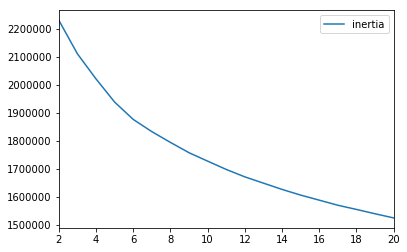

In [62]:
import matplotlib.pyplot as plt
inertia.plot()
plt.show()

In [76]:
## the center is in the form of 
#
# [index  of the cluster, n features in the cluster]
#
# i.e. the number of rows is actually the number of clusters created 
#
# To get what it actually predicted (in terms of labels - the digits) we need to know
# what is the label(s) for these centroids??
#

centers[5] # 5 = the 5th n_clusters which means using n_clusters = 7 to train the model

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.082020,2.395249,-1.402395,0.452784,0.179668,-0.049954,-0.742051,0.505450,0.282251,0.779866,...,0.009392,-0.004496,-0.008323,-0.007605,-0.018507,-0.011683,0.001713,0.007499,-0.002775,-0.004215
1,-2.867544,-1.271693,0.245073,0.412873,-0.757638,0.021601,0.136439,-0.288259,0.302991,0.237147,...,-0.004865,-0.002022,-0.000558,-0.002659,0.001267,-0.009114,-0.002064,-0.006929,-0.003912,0.003688
2,0.393894,-0.879738,1.466901,-1.744031,0.677636,0.021752,-0.563335,-0.086733,-0.331015,0.425205,...,-0.000032,-0.009524,-0.017826,-0.013130,0.005429,0.006004,-0.003107,-0.004024,-0.005742,0.013190
3,0.781772,-1.657453,-2.295465,-0.799372,0.615403,-0.165403,-0.173237,0.288506,-0.038938,-0.709662,...,-0.010542,0.004003,0.005578,0.007539,0.002996,0.006948,0.005386,-0.000692,0.015007,-0.006861
4,0.881147,-0.282425,0.982788,2.216478,1.074888,-0.636534,0.496746,0.114547,-0.375314,-0.025221,...,0.011841,-0.001415,0.008383,-0.005397,0.004956,0.012228,-0.004822,0.007452,0.000922,-0.001646
5,-0.922107,2.259273,0.968446,-1.083282,-0.201394,0.654500,0.584307,-0.166589,-0.160735,-1.035270,...,-0.005807,0.012774,0.009807,0.018888,0.014990,0.008653,0.014058,0.000991,-0.002245,-0.006791
6,4.381337,-0.858099,0.332545,-0.165609,-2.460651,0.391403,0.249215,-0.614140,0.367254,0.474878,...,-0.001160,0.000512,0.000255,0.003938,-0.016999,-0.017710,-0.018473,-0.007669,-0.001772,0.007124


In [64]:
predictions[5].tail()

,predicted_cluster_index
49995,3
49996,6
49997,3
49998,0
49999,3


In [11]:
y_train.shape

(50000,)

In [12]:
predictions[3].shape

(50000, 1)

In [146]:
## To see how well clustering perform, let's see the statistics within each cluser
# 
# Since we know each row of X_train is now associated with an index to a cluster,
# we can find within a cluster (index) how many X_train data and the y_label are there
#
# For each cluster, there will be a dominant labels (the most frequent one)
# and the centroid of the cluster should theoretically be closest to this most frequent
# label.

pd_y_train = pd.DataFrame(data=y_train, columns=['labels'])
predictions_labeled = [pd.concat([p,pd_y_train], axis=1) for p in predictions ]

# Find the value of the most frequent labels within each clusters
list_predictedClusterIndex_mostFreqCount = [pd.DataFrame(data=p.groupby('predicted_cluster_index').agg(lambda x:x.value_counts().iloc[0])) for \
                                           p in predictions_labeled]



In [172]:
# Experimenting to see what the data actually looks like
#
# Search for dataframe multiindex 
# https://stackoverflow.com/questions/48956379/getting-max-values-from-pandas-multiindex-dataframe

# Multi index label counts per cluster index
tempAll = pd.DataFrame(data=predictions_labled[10].groupby('predicted_cluster_index').agg({'labels':'value_counts'}))
print(tempAll)

tempAll2 = pd.DataFrame(data=predictions_labled[10].groupby('predicted_cluster_index').agg(lambda x:x.value_counts().iloc[0]))
print(tempAll2.head())
print(tempAll2.sum())
print(tempAll2['labels'].sum())


# Generate dataframe with cluster index to labels of max count
tempMult = predictions_labled[10].groupby('predicted_cluster_index')['labels'].value_counts()
clusterIdx_max_label = tempMult.loc[tempMult.groupby(level=0).idxmax]
print(clusterIdx_max_label)

## total count per cluster
tempCount = pd.DataFrame(data=predictions_labled[10]['predicted_cluster_index'].value_counts())
print(tempCount)
print(tempCount.sum())



                                labels
predicted_cluster_index labels        
0                       1         3157
                        3          291
                        2          248
                        8          205
                        7          182
                        9          114
                        5           93
                        4           64
                        6           60
                        0            1
1                       2         3456
                        3          182
                        8           38
                        7           25
                        6           14
                        4           13
                        0           11
                        1            9
                        9            8
                        5            2
2                       6         2494
                        5          378
                        0          225
                        2

In [152]:
## So now we have a mapping on what each cluster predicts (for the 10th n_cluster result)
## Let's create a list for such result with all values of n_clusters

def get_cluster_index_to_label(pd):
    tempMult = pd.groupby('predicted_cluster_index')['labels'].value_counts()
    result = tempMult.loc[tempMult.groupby(level=0).idxmax]  # it is a dataframe
    result.columns = ['predicted_cluster_index','labels','counts']
    return result
    
list_preidctedClusterIndex_label_maxCount = [get_cluster_index_to_label(p) for p in predictions_labeled]

In [156]:
print(list_preidctedClusterIndex_label_maxCount[10].tail())

predicted_cluster_index  labels
7                        4         1850
8                        8         2738
9                        7         1982
10                       1         2468
11                       0         2061
Name: labels, dtype: int64


In [17]:
def get_overall_accuracy(p):
    pd_maxCount=pd.DataFrame(data=p.groupby('predicted_cluster_index').agg(lambda x:x.value_counts().iloc[0]))
    maxCount_sum = pd_maxCount['labels'].sum()
    pd_sum_all= pd.DataFrame(data=p['predicted_cluster_index'].value_counts())
    return maxCount_sum/pd_sum_all.sum()
    

In [173]:
## What is accuracy then?
#
# Per cluster = [most frequent count]/[total count in the cluster]
#
# Across all cluster = [most frequent count].sum_over_all_clusters/[total observations]
#
# The goal is to plot how over all accuracy varies over values of n_cluster

def get_accuracy(pred_labeled):
    
    n_clusters_to_accuracy = []
    
    # Find the value of the most frequent labels within each clusters
    for p in pred_labeled:
        n_clusters_to_accuracy.append(get_overall_accuracy(p))
        
    return n_clusters_to_accuracy ## However it is a list, not indexed with the actual n_clusters value
        

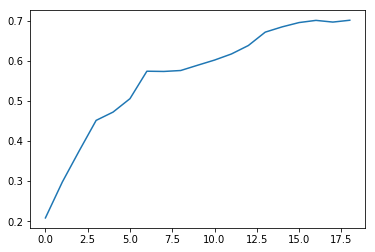

In [174]:
## Now plot the graph
to_be_plot = get_accuracy(predictions_labeled)
plt.plot(to_be_plot)
plt.show()

In [175]:
## It shows that as the number of clusters increases the accuracy increases 
## But it platoons after a certain value

## A function to do all the above in one go

import matplotlib.pyplot as plt

def investigate_n_clusters_with_accuracy(pd_x_train):
    
    # pd_x_train = pd_X_train_PCA
    inertia, model, predictions, centers = get_kMeans_inertia_pd(pd_x_train, range(2,21), train_index)
    
    # Plot inertia
    inertia.plot()
    plt.show()
    
    # For each cluster, there will be a dominant labels (the most frequent one)
    # and the centroid of the cluster should theoretically be closest to this most frequent
    # label.

    pd_y_train = pd.DataFrame(data=y_train, columns=['labels'])
    predictions_labeled = [pd.concat([p,pd_y_train], axis=1) for p in predictions ]

    accuracy_list = get_accuracy(predictions_labeled)
    plt.plot(accuracy_list)
    plt.show()
    

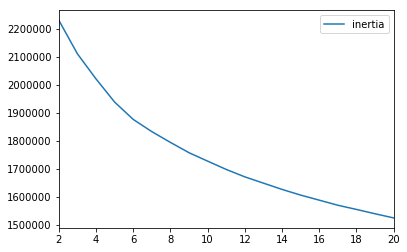

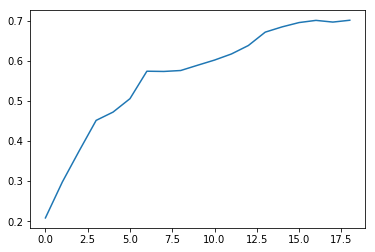

In [176]:
investigate_n_clusters_with_accuracy(pd_X_train_PCA)

### Hierarchical Clustering

In [2]:
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist

In [5]:
## 
#
# Need to run the approve first 2 cells to load the data, PCA, and dataframe it first
#
##

cutoff = 99
Z = fastcluster.linkage_vector(pd_X_train_PCA.loc[:,0:cutoff], method='ward', metric='euclidean')
Z_dataFrame = pd.DataFrame(data=Z, columns=['clusterOne','clusterTwo','distance','newClusterSize'])

In [6]:
Z_dataFrame.iloc[:20]

,clusterOne,clusterTwo,distance,newClusterSize
0,42194.0,43025.0,0.562682,2.0
1,28350.0,37674.0,0.590866,2.0
2,26696.0,44705.0,0.621506,2.0
3,12634.0,32823.0,0.627762,2.0
4,24707.0,43151.0,0.637668,2.0
5,20465.0,24483.0,0.662557,2.0
6,466.0,42098.0,0.664189,2.0
7,46542.0,49961.0,0.665520,2.0
8,2301.0,5732.0,0.671215,2.0
9,37564.0,47668.0,0.675121,2.0


In [7]:
Z_dataFrame.iloc[49980:]

,clusterOne,clusterTwo,distance,newClusterSize
49980,99965.0,99972.0,161.106998,5197.0
49981,99932.0,99980.0,172.070003,6505.0
49982,99945.0,99960.0,182.840860,3245.0
49983,99964.0,99976.0,184.475761,3683.0
49984,99974.0,99979.0,185.027847,7744.0
49985,99940.0,99975.0,185.345207,5596.0
49986,99957.0,99967.0,211.854714,5957.0
49987,99938.0,99983.0,215.494857,4846.0
49988,99978.0,99984.0,216.760365,11072.0
49989,99970.0,99973.0,217.355871,4899.0


In [ ]:
## Explanations
#
# 1. ClusterOne and ClusterTwo represents the two clusters (or a single observation) that are joined together at each iteration
#
# 2. Distance is the distance calculated by Ward (??) and Euclidean
#
# 3. Cluster size is the number of observations (a single data row in MNIST) in the joined cluster
#
# 4. What is the number under clusterOne/Two mean? e.g. 37285.0 
# It is actually the observation/cluster number but it could be larger than 50,000 because of the new clusters produced

In [ ]:
## Observations
#
# 1. Distance monotonically increasing - meaning closest points/clusters are merged first
# 2. Initially the size of the merged cluster is 2 - two observations are joined initially
# 3. Towards the end the number of observations in the joined cluster increases
# 4. In each iteraction, two clusters/observations will be merged
# 5. There is 50000-1 iterations of merging
# 6. The last iteration will produce a big cluster of every observations (hence 500000 items in the cluster)
# 7. The dendrogram is hence produced

In [ ]:
### Now we need to decide how many clusters do we want
### In a sense we still need to decide on the number of clusters
### But there is a way to get the optimal number of clusters
### See https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

### Though in the MNIST case it is quite difficult to draw the dendrogram ...

In [8]:
# Pick cluster number to be 20, similar to KMeans

In [21]:
from scipy.cluster.hierarchy import fcluster

distance_threshold = 160  ## How do we decide this value?? Reverse engineering?
clusters = fcluster(Z, distance_threshold, criterion='distance')
pd_X_train_hierClustered = pd.DataFrame(data=clusters,index=pd_X_train_PCA.index,columns=['predicted_cluster_index'])

print("Number of distinct clusters: ", len(pd_X_train_hierClustered['predicted_cluster_index'].unique()))

Number of distinct clusters:  20


In [16]:
pd_X_train_hierClustered.head()

,cluster
0,5
1,3
2,15
3,11
4,14


In [23]:
import matplotlib.pyplot as plt

pd_y_train = pd.DataFrame(data=y_train, columns=['labels'])
predictions_labeled = pd.concat([pd_X_train_hierClustered,pd_y_train], axis=1)

overall_accuracy = get_overall_accuracy(predictions_labeled)
print(overall_accuracy)

predicted_cluster_index    0.76882
dtype: float64


### DBSCAN

In [25]:
from sklearn.cluster import DBSCAN

eps = 3
min_samples = 5
leaf_size = 30
n_jobs = 4

##
# 1. eps is the threshold within it we calculate the number of samples
# 2. min_sample is the min number of samples to form a cluster
# 3. What is leaf_size ??
# 4. n_jobs >> ??
##


db = DBSCAN(eps=eps, min_samples=min_samples, leaf_size=leaf_size, n_jobs=n_jobs)

cutoff = 99
X_train_PCA_dbscanClustered = db.fit_predict(pd_X_train_PCA.loc[:,0:cutoff])
pd_X_train_PCA_dbscanClustered = pd.DataFrame(data=X_train_PCA_dbscanClustered, \
                                              index=pd_X_train.index, columns=['predicted_cluster_index'])

In [26]:
pd_y_train = pd.DataFrame(data=y_train, columns=['labels'])
predictions_labeled = pd.concat([pd_X_train_PCA_dbscanClustered,pd_y_train], axis=1)

overall_accuracy = get_overall_accuracy(predictions_labeled)

In [27]:
print(overall_accuracy)

predicted_cluster_index    0.242
dtype: float64


In [ ]:
## Skip HDBSCAN. As DBSCAN does seem to have good performance on MNIST data